# Loading Modules

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import csv

%matplotlib inline

# Read CSV

In [67]:
house_train = pd.read_csv('train.csv')
house_train.shape

(1460, 81)

In [68]:
house_test = pd.read_csv('test.csv')
house_test.shape

(1459, 80)

In [69]:
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Fixing Level Names

In [70]:
# Define function to create the factor dataframe from data description text file
# important to retain the order of levels in the data description

# FIXING LEVEL NAMES 
factorLevel = {}

with open('data_description.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.find(':') != -1 and line.find(' ') != 0:
            col_name = re.sub(':.*', '', line).strip()
            factorLevel[col_name] = []
        else:
            if len(re.findall('[a-zA-Z]', line)) > 0 :
                level = re.sub('\t.*', '', line).strip()
                if level !='':
                    factorLevel[col_name].append(level)             
                    
# outputs factorLevel as a list
#factorLevel = [k for k in factorLevel.items() if len(k[1]) > 0]
#factorLevel = pd.DataFrame(factorLevel)

# outputs factorLevel as a dict without any blank spaces
factorLevel = {k:v for k,v in factorLevel.items() if len(v) > 0}


In [71]:
factorLevel

{'Alley': ['Grvl', 'Pave', 'NA'],
 'BldgType': ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'],
 'BsmtCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
 'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
 'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
 'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
 'CentralAir': ['N', 'Y'],
 'Condition1': ['Artery',
  'Feedr',
  'Norm',
  'RRNn',
  'RRAn',
  'PosN',
  'PosA',
  'RRNe',
  'RRAe'],
 'Condition2': ['Artery',
  'Feedr',
  'Norm',
  'RRNn',
  'RRAn',
  'PosN',
  'PosA',
  'RRNe',
  'RRAe'],
 'Electrical': ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
 'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'Exterior1st': ['AsbShng',
  'AsphShn',
  'BrkComm',
  'BrkFace',
  'CBlock',
  'CemntBd',
  'HdBoard',
  'ImStucc',
  'MetalSd',
  'Other',
  'Plywood',
  'PreCast',
  'Stone',
  'Stucco',
  'VinylSd',
  'Wd Sdng',
  'WdSh

In [72]:
# Checking for Level name differences

for varname in factorLevel.keys():
    house_train_factors = [str(x) for x in house_train.loc[:,varname].unique()]
    levelDiff = set(house_train_factors) - set(factorLevel[varname])
    if len(levelDiff) > 0 and levelDiff != {'nan'}:
        print(varname,':', levelDiff)


MSZoning : {'C (all)'}
Neighborhood : {'NAmes'}
BldgType : {'Duplex', '2fmCon', 'Twnhs'}
Exterior2nd : {'Brk Cmn', 'CmentBd', 'Wd Shng'}


In [73]:
# Change factorLevel levels to match house_train levels

house_train.MSZoning.unique()
factorLevel['MSZoning'][1] = 'C (all)'

house_train.Neighborhood.unique()
factorLevel['Neighborhood'][12] = 'NAmes'

house_train.BldgType.unique()
factorLevel['BldgType'][1:3] = ['2fmCon','Duplex']
factorLevel['BldgType'][4] = 'Twnhs'

house_train.Exterior2nd.unique()
factorLevel['Exterior2nd'][16] = 'Wd Shng'
factorLevel['Exterior2nd'][2] = 'Brk Cmn'
factorLevel['Exterior2nd'][5] = 'CmentBd'

In [74]:
house_train.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [75]:
# convert current numerical variables to object so it can be converted to category
house_train.MSSubClass =  house_train.MSSubClass.astype('str')
house_train.OverallQual = house_train.OverallQual.astype('str')
house_train.OverallCond = house_train.OverallCond.astype('str')

# Doing the same for the test set
house_test.MSSubClass =  house_test.MSSubClass.astype('str')
house_test.OverallQual = house_test.OverallQual.astype('str')
house_test.OverallCond = house_test.OverallCond.astype('str')

In [76]:
# Converting Column data types in data sets into category and setting levels from the factorlevel dictionary 
for varname in factorLevel.keys():
    house_train.loc[:,varname] = house_train.loc[:,varname].astype('category')
    house_train.loc[:,varname] = house_train.loc[:,varname].cat.set_categories(factorLevel[varname], ordered = True)
    house_test.loc[:,varname] = house_test.loc[:,varname].astype('category')
    house_test.loc[:,varname] = house_test.loc[:,varname].cat.set_categories(factorLevel[varname], ordered = True)
  

In [77]:
house_train.dtypes.head()

Id                int64
MSSubClass     category
MSZoning       category
LotFrontage     float64
LotArea           int64
dtype: object

In [78]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
house_test.dtypes.head()

Id                int64
MSSubClass     category
MSZoning       category
LotFrontage     float64
LotArea           int64
dtype: object

In [80]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [81]:
# Nulling id column
del house_train['Id']
del house_test['Id']

#  VISUALIZATIONS

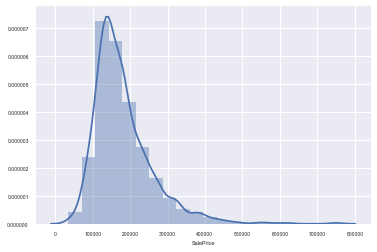

In [82]:
# HISTORGRAM OF SALESPRICE
sns.distplot(house_train.SalePrice, bins = 20)

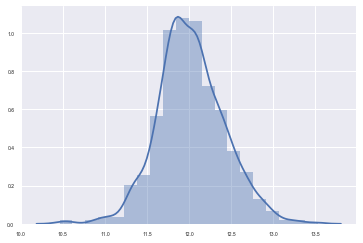

In [83]:
# Transforming Y into normal dist.
sns.distplot([np.log(house_train.SalePrice + 1)], bins = 20)

# CORRELATION PLOT BETWEEN CONTINUOUS VARIABLES

In [84]:
# Keeping only numeric variables
numeric_features = house_train.select_dtypes(include=['float64','int64']).columns.values
numeric_features

array(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

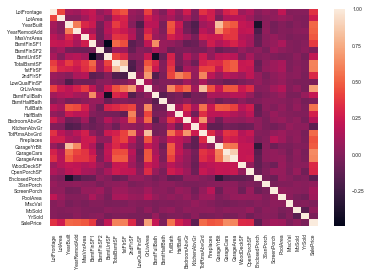

In [85]:
# correlating between continuous variables in training set
corr_num = house_train[numeric_features].corr()
#sns.set(font_scale = .5)
sns.heatmap(corr_num)

## TotalBsmtSF correlated to 1stFldrSF
## GarageCars and GarageArea correlated


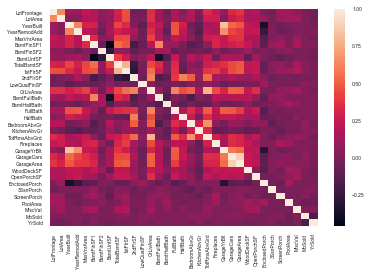

In [86]:
# correlating between continuous variables in TEST set 
corr_numtest = house_test[numeric_features[:-1]].corr()
sns.set(font_scale = .5)
sns.heatmap(corr_numtest)